## The attached code is a run of the Gaussian Process Regression model on data from booking without the addition of new features


C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Regression Results:
Train R2: 1.0
Train RMSE: 3.761376662833337e-11
Train MSE: 1.4147954399707252e-21
Train MAE: 3.235909942812809e-11
Test R2: -3.011969847123245
Test RMSE: 0.3825287262857441
Test MSE: 0.1463282264337937
Test MAE: 0.3314442843419788


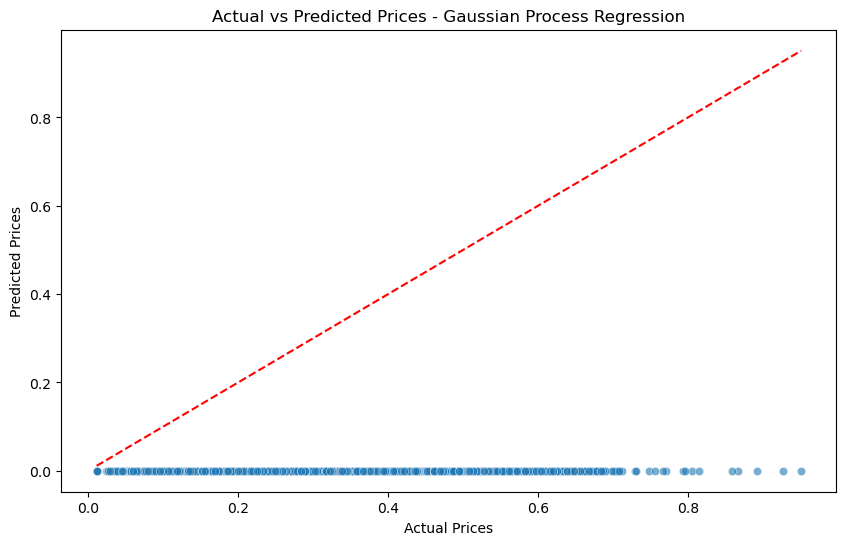

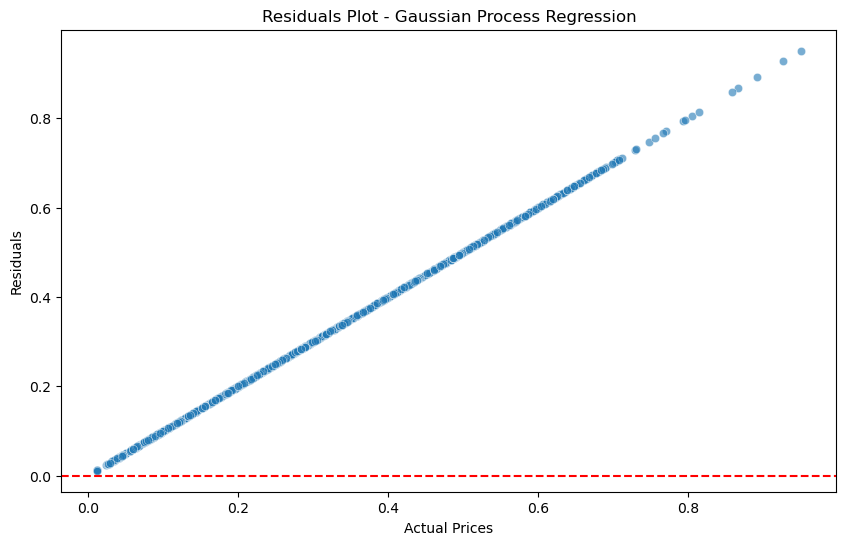

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./0507_cleaned_booking_hotels.csv')
df2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize the specified columns
scaler = MinMaxScaler()
columns_to_normalize = ['star_rating', 'reviews', 'score', 'price', 'index', 'TTT', 'los']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Split the data into features and target
X = df.drop(columns=['price'])
y = df['price']

# Randomly select 5000 samples for training and 1000 samples for testing without overlap
np.random.seed(42)
train_indices = np.random.choice(X.index, 5000, replace=False)
remaining_indices = list(set(X.index) - set(train_indices))
test_indices = np.random.choice(remaining_indices, 1000, replace=False)

X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Initialize and fit the Gaussian Process Regressor with RBF kernel
kernel = RBF(length_scale=1.0)
model = GaussianProcessRegressor(kernel=kernel, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Gaussian Process Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Gaussian Process Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Gaussian Process Regression')
plt.show()




## The attached code is a run of the Gaussian Process Regression model on booking data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)


Gaussian Process Regression Results:
Train R2: 0.999999999999879
Train RMSE: 6.884537459191444e-08
Train MSE: 4.739685602701019e-15
Train MAE: 8.24424824770048e-09
Test R2: 0.9224777238386395
Test RMSE: 0.05567066716517003
Test MSE: 0.0030992231826151404
Test MAE: 0.03359054001608078


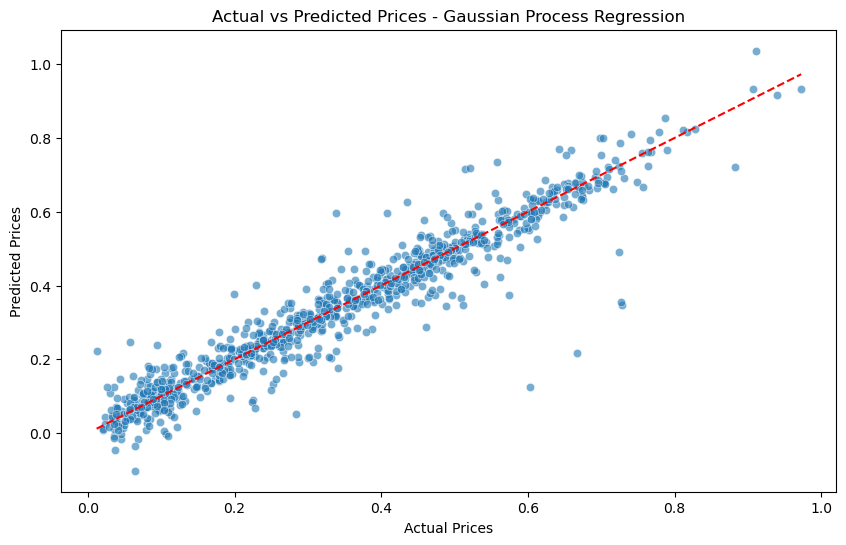

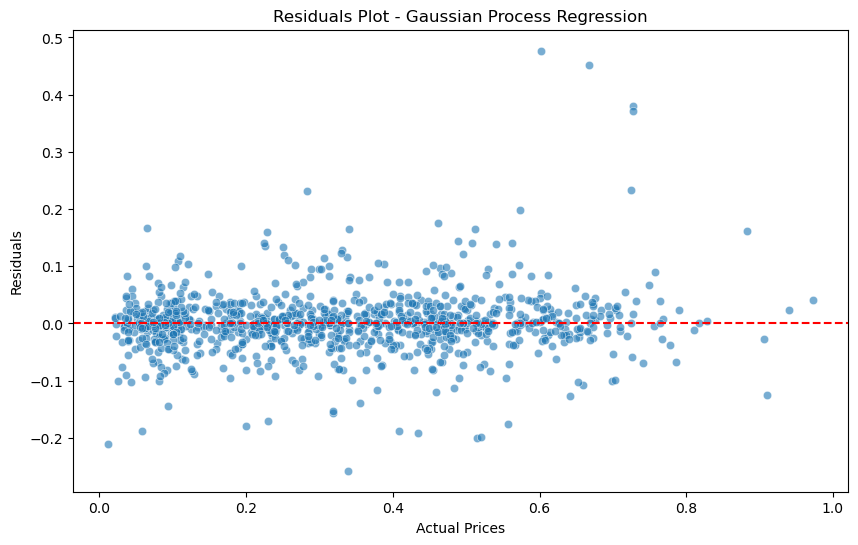

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize the specified columns
scaler = MinMaxScaler()
columns_to_normalize = ['star_rating', 'reviews', 'score', 'price', 'index', 'TTT', 'los']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Split the data into features and target
X = df.drop(columns=['price'])
y = df['price']

# Randomly select 5000 samples for training and 1000 samples for testing without overlap
np.random.seed(42)
train_indices = np.random.choice(X.index, 5000, replace=False)
remaining_indices = list(set(X.index) - set(train_indices))
test_indices = np.random.choice(remaining_indices, 1000, replace=False)

X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

# Initialize and fit the Gaussian Process Regressor with RBF kernel
kernel = RBF(length_scale=1.0)
model = GaussianProcessRegressor(kernel=kernel, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Gaussian Process Regression Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Gaussian Process Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Gaussian Process Regression')
plt.show()




## Summary and conclusions :
In this notebook we ran the Gaussian Process Regression model. There was no point in adding a notebook of non-normalized files because the results were bad, in this notebook you can see that the performance without the new features is bad. We did not find a special reason for this, but the performance with the new features is much better.
In addition, the size of the group we worked on was a total of several thousand random rows from the data for the reason that our computers were unable to run the model on a larger data frame. We tried several times without success.